# Librerías

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

### Cargar los Datasets

In [19]:
# Cargar los datasets
homicidios = pd.read_excel('files/homicidios.xlsx', sheet_name=None)
lesiones = pd.read_excel('files/lesiones.xlsx', sheet_name=None)

# Mostrar los nombres de las hojas
print("Hojas en el archivo de homicidios:", homicidios.keys())
print("Hojas en el archivo de lesiones:", lesiones.keys())


Hojas en el archivo de homicidios: dict_keys(['HECHOS', 'VICTIMAS'])
Hojas en el archivo de lesiones: dict_keys(['HECHOS', 'DICCIONARIO_HECHOS', 'VICTIMAS', 'DICCIONARIO_VICTIMAS'])


## homicidios.xlsx

#### Dimensiones y Tipos de Datos

##### 'HECHOS'

In [31]:
# Dimensiones y tipos de datos
homicidios_hechos = homicidios['HECHOS']
dimensiones_hechos = pd.DataFrame({
    'Filas': [homicidios_hechos.shape[0]],
    'Columnas': [homicidios_hechos.shape[1]]
})
tipos_hechos = pd.DataFrame(homicidios_hechos.dtypes, columns=['Tipo de Dato'])

display(dimensiones_hechos)
display(tipos_hechos)

,Filas,Columnas
0,696,21


,Tipo de Dato
ID,object
N_VICTIMAS,int64
FECHA,datetime64[ns]
AAAA,int64
MM,int64
DD,int64
HORA,object
HH,object
LUGAR_DEL_HECHO,object
TIPO_DE_CALLE,object


##### 'VICTIMAS'

In [78]:
# Dimensiones y tipos de datos
homicidios_victimas = homicidios['VICTIMAS']
dimensiones_victimas = pd.DataFrame({
    'Filas': [homicidios_victimas.shape[0]],
    'Columnas': [homicidios_victimas.shape[1]]
})
tipos_victimas = pd.DataFrame(homicidios_victimas.dtypes, columns=['Tipo de Dato'])

# Mostrar dimensiones y tipos de datos
display(dimensiones_victimas)
display(tipos_victimas)


,Filas,Columnas
0,717,10


,Tipo de Dato
ID_hecho,object
FECHA,datetime64[ns]
AAAA,int64
MM,int64
DD,int64
ROL,object
VICTIMA,object
SEXO,object
EDAD,object
FECHA_FALLECIMIENTO,object


#### Valores faltantes

##### 'HECHOS'

In [61]:
# Valores faltantes
valores_faltantes_hechos = pd.DataFrame(homicidios_hechos.isnull().sum(), columns=['Valores Faltantes'])
valores_faltantes_hechos

,Valores Faltantes
ID,0
N_VICTIMAS,0
FECHA,0
AAAA,0
MM,0
DD,0
HORA,0
HH,0
LUGAR_DEL_HECHO,0
TIPO_DE_CALLE,0


Análisis de los valores faltantes: 

- Calle: Solo hay un valor faltante. Probablemente sea insignificante y no afecta el análisis general.

- Altura: Hay 567 valores faltantes, lo cual representa un 81% aproximandamente de todos los registros.

- Cruce: Hay 171 valores faltantes, lo cual indica que en el 30% de los casos, no se registró un cruce.

- Dirección Normalizada: Hay 8 valores faltantes, lo cual es relativamente bajo y podría ser manejable.

Acciones a tomar:



1. Calle: reemplazar el valor por 'desconocido'

In [68]:
# 1. Reemplazar valores faltantes en 'Calle'
homicidios_hechos['Calle'].fillna('Desconocido', inplace=True)


2. Altura: Analizar si tiene un patrón relacionado con el cruce.

3. Cruce: Analizar si  tiene un patrón relacionado con la altura.

In [65]:
# Análisis de patrones en los datos faltantes
faltantes_altura = homicidios_hechos[homicidios_hechos['Altura'].isnull()]
faltantes_cruce = homicidios_hechos[homicidios_hechos['Cruce'].isnull()]

# Verificar si los registros que tienen cruce no tienen altura y viceversa
altura_sin_cruce = faltantes_altura['Cruce'].notnull().sum()
cruce_sin_altura = faltantes_cruce['Altura'].notnull().sum()

# Guardar los resultados en un dataframe para documentar
patrones_faltantes = pd.DataFrame({
    'Altura sin Cruce': [altura_sin_cruce],
    'Cruce sin Altura': [cruce_sin_altura]
})
patrones_faltantes

,Altura sin Cruce,Cruce sin Altura
0,525,129


4. Dirección Normalizada: Ver específicamente esos valores y analizarlo

In [67]:
# Mostrar los registros donde falta la 'Dirección Normalizada'
registros_faltantes_direccion = homicidios_hechos[homicidios_hechos['Dirección Normalizada'].isnull()]

registros_faltantes_direccion

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS


Resultado del análisis:

- Altura: Se observa que, en la gran mayoría, los registros que tienen un Cruce no tienen Altura y viceversa. Esto tiene sentido ya que, en intersecciones, la altura puede no ser necesaria para identificar la ubicación del siniestro.

- Cruce: Los registros que no tienen Cruce suelen tener Altura, indicando que la ubicación fue registrada de otra manera.

- Dirección Normalizada: Hay 8 valores faltantes, los cuales 7 corresponden a autopistas, lo cual es lógico ya que estas ubicaciones pueden no tener una dirección normalizada.

In [73]:
# Reemplazar valores nulos en 'Altura' con 'Desconocido'
homicidios_hechos['Altura'].fillna('Desconocido', inplace=True)

# Reemplazar valores nulos en 'Cruce' con 'Desconocido'
homicidios_hechos['Cruce'].fillna('Desconocido', inplace=True)

# Verificar que se han reemplazado correctamente
print(homicidios_hechos[['Altura', 'Cruce']].isnull().sum())

Altura    0
Cruce     0
dtype: int64


##### 'VICTIMAS'

In [79]:
# Verificar valores faltantes en la hoja 'VICTIMAS'
valores_faltantes_victimas = pd.DataFrame(homicidios_victimas.isnull().sum(), columns=['Valores Faltantes'])
display(valores_faltantes_victimas)

,Valores Faltantes
ID_hecho,0
FECHA,0
AAAA,0
MM,0
DD,0
ROL,0
VICTIMA,0
SEXO,0
EDAD,0
FECHA_FALLECIMIENTO,0


No hay ningún valor faltante para 'VICTIMAS'

#### Outliers

##### 'HECHOS'

Verificación de horas atípicas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarnos de que la columna 'HORA' esté en el formato correcto
homicidios_hechos['HORA'] = pd.to_datetime(homicidios_hechos['HORA'], format='%H:%M:%S', errors='coerce')

# Verificar la conversión
print(homicidios_hechos['HORA'].head(20))

NameError: name 'homicidios_hechos' is not defined

IndexError: index 0 is out of bounds for axis 0 with size 0

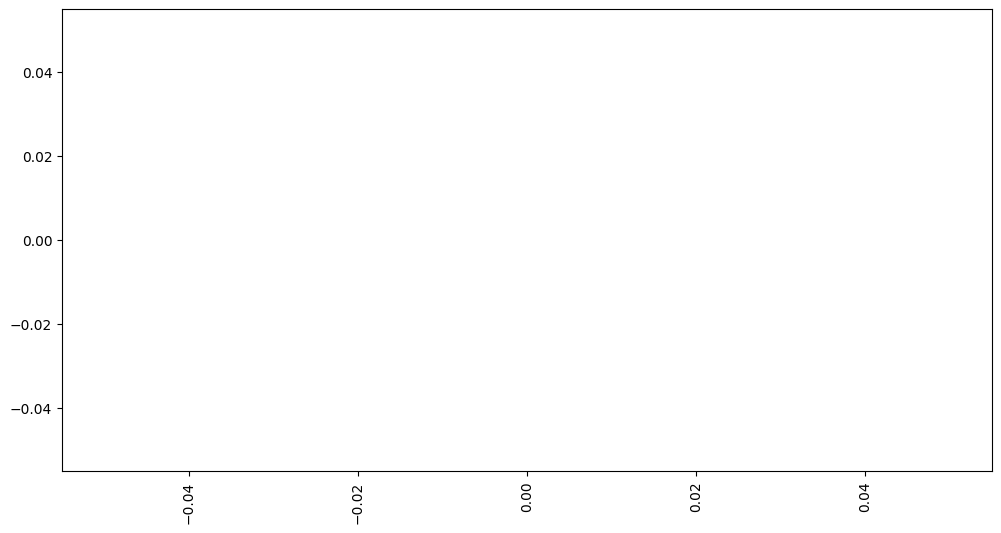

In [98]:
# Convertir la columna HORA a formato datetime.time si no se ha hecho ya
homicidios_hechos['HORA'] = pd.to_datetime(homicidios_hechos['HORA'], format='%H:%M', errors='coerce').dt.time

# Extraer la hora en formato numérico
homicidios_hechos['HORA_NUM'] = homicidios_hechos['HORA'].apply(lambda x: x.hour if pd.notnull(x) else np.nan)

# Contar la frecuencia de cada hora
frecuencia_horas = homicidios_hechos['HORA_NUM'].value_counts().sort_index()

# Graficar la frecuencia de cada hora
plt.figure(figsize=(12, 6))
frecuencia_horas.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Siniestros por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

In [93]:
# Mostrar valores únicos de la columna 'HORA'
valores_unicos_hora = homicidios_hechos['HORA'].unique()
valores_unicos_hora

array([NaT, datetime.time(0, 0), datetime.time(7, 12),
       datetime.time(18, 40)], dtype=object)

Distribución por tipo de calle

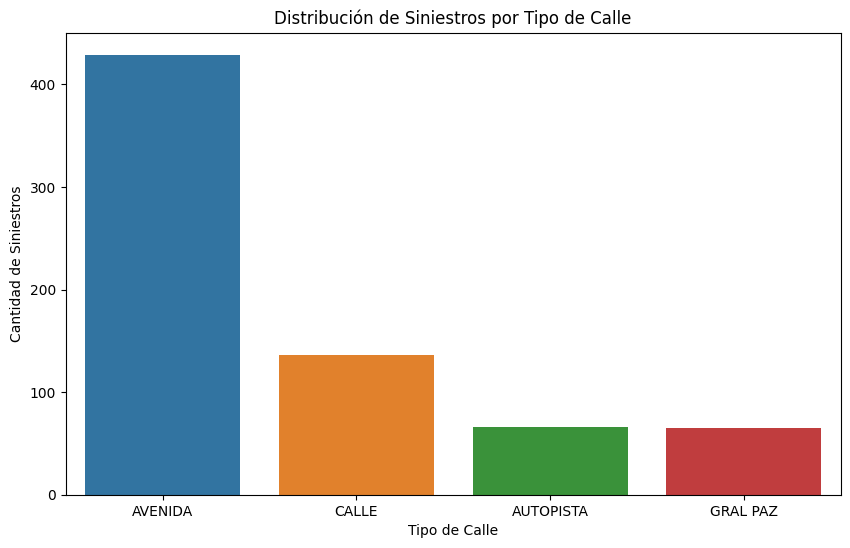

In [89]:
# Análisis de distribución por tipo de calle
distribucion_tipo_calle = homicidios_hechos['TIPO_DE_CALLE'].value_counts()

# Visualización de la distribución
plt.figure(figsize=(10, 6))
sns.barplot(x=distribucion_tipo_calle.index, y=distribucion_tipo_calle.values)
plt.title('Distribución de Siniestros por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Siniestros')
plt.show()

Distribucón por Comuna

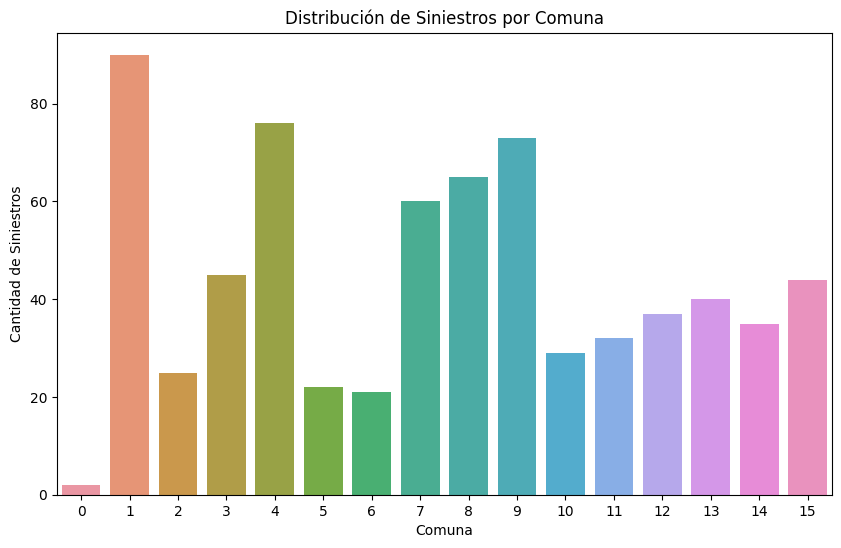

In [90]:
# Análisis de distribución por comuna
distribucion_comuna = homicidios_hechos['COMUNA'].value_counts()

# Visualización de la distribución
plt.figure(figsize=(10, 6))
sns.barplot(x=distribucion_comuna.index, y=distribucion_comuna.values)
plt.title('Distribución de Siniestros por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Siniestros')
plt.show()

Distribución por vehículo involucrado

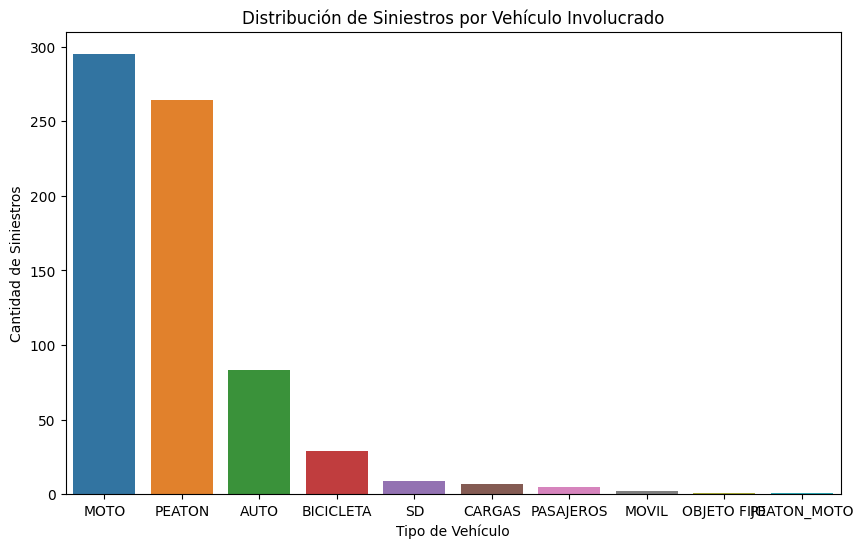

In [91]:
# Análisis de distribución por vehículo involucrado
distribucion_vehiculo = homicidios_hechos['VICTIMA'].value_counts()

# Visualización de la distribución
plt.figure(figsize=(10, 6))
sns.barplot(x=distribucion_vehiculo.index, y=distribucion_vehiculo.values)
plt.title('Distribución de Siniestros por Vehículo Involucrado')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad de Siniestros')
plt.show()


Distribución por año

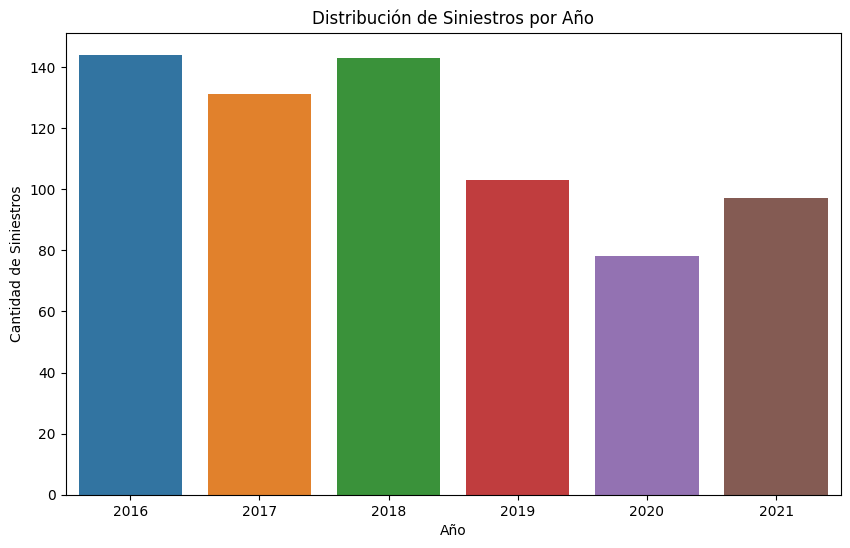

In [92]:
# Análisis de distribución por año
distribucion_anio = homicidios_hechos['AAAA'].value_counts().sort_index()

# Visualización de la distribución por año
plt.figure(figsize=(10, 6))
sns.barplot(x=distribucion_anio.index, y=distribucion_anio.values)
plt.title('Distribución de Siniestros por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Siniestros')
plt.show()

#### Resumen estadístico

In [59]:
import pandas as pd

# Crear DataFrame de Descripción de Estadísticos
descripciones_estadisticos = pd.DataFrame({
    'Estadístico': ['count', 'unique', 'top', 'freq', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    'Descripción': [
        'Cuenta el número de registros no nulos',
        'Cuenta el número de valores únicos',
        'El valor más frecuente (solo para datos categóricos)',
        'La frecuencia del valor más frecuente (solo para datos categóricos)',
        'Promedio de los valores (solo para datos numéricos)',
        'Desviación estándar de los valores (solo para datos numéricos)',
        'Valor mínimo (solo para datos numéricos)',
        'Percentil 25 (primer cuartil, solo para datos numéricos)',
        'Mediana o percentil 50 (segundo cuartil, solo para datos numéricos)',
        'Percentil 75 (tercer cuartil, solo para datos numéricos)',
        'Valor máximo (solo para datos numéricos)'
    ]
})

# Ajustar las opciones de visualización de pandas
pd.set_option('display.max_colwidth', None)

# Mostrar el DataFrame de Descripciones de Estadísticos
display(descripciones_estadisticos)

# Resumen Estadístico de la Hoja "HECHOS" del archivo de homicidios
homicidios_hechos = pd.read_excel('files/homicidios.xlsx', sheet_name='HECHOS')

# DataFrame con el resumen estadístico del dataset
resumen_estadístico_hechos = homicidios_hechos.describe(include='all').transpose()

# Mostrar el DataFrame de resumen estadístico
display(resumen_estadístico_hechos)

,Estadístico,Descripción
0,count,Cuenta el número de registros no nulos
1,unique,Cuenta el número de valores únicos
2,top,El valor más frecuente (solo para datos categóricos)
3,freq,La frecuencia del valor más frecuente (solo para datos categóricos)
4,mean,Promedio de los valores (solo para datos numéricos)
5,std,Desviación estándar de los valores (solo para datos numéricos)
6,min,Valor mínimo (solo para datos numéricos)
7,25%,"Percentil 25 (primer cuartil, solo para datos numéricos)"
8,50%,"Mediana o percentil 50 (segundo cuartil, solo para datos numéricos)"
9,75%,"Percentil 75 (tercer cuartil, solo para datos numéricos)"


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,696,696,2021-0097,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N_VICTIMAS,696.0,NaN,NaN,NaN,1.030172,1.0,1.0,1.0,1.0,3.0,0.179393
FECHA,696,NaN,NaN,NaN,2018-09-14 05:12:24.827586048,2016-01-01 00:00:00,2017-04-02 12:00:00,2018-07-12 12:00:00,2020-01-04 06:00:00,2021-12-30 00:00:00,NaN
AAAA,696.0,NaN,NaN,NaN,2018.188218,2016.0,2017.0,2018.0,2020.0,2021.0,1.683754
MM,696.0,NaN,NaN,NaN,6.692529,1.0,4.0,7.0,10.0,12.0,3.571309
DD,696.0,NaN,NaN,NaN,15.936782,1.0,9.0,16.0,23.0,31.0,8.639646
HORA,696,375,14:00:00,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HH,696.0,25.0,7.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LUGAR_DEL_HECHO,696,683,AV 27 DE FEBRERO Y AV ESCALADA,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIPO_DE_CALLE,696,4,AVENIDA,429,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Primeros registros
primeros_registros_hechos = homicidios_hechos.head()
display(primeros_registros_hechos)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


### Análisis Inicial de 'VICTIMAS'

#### Dimensiones y Tipos de Datos

In [40]:
# Dimensiones y tipos de datos
homicidios_victimas = homicidios['VICTIMAS']

dimensiones_victimas = pd.DataFrame({
    'Filas': [homicidios_victimas.shape[0]],
    'Columnas': [homicidios_victimas.shape[1]]
})
display(dimensiones_victimas)

tipos_victimas = pd.DataFrame(homicidios_victimas.dtypes, columns=['Tipo de Dato'])
display(tipos_victimas)

,Filas,Columnas
0,717,10


,Tipo de Dato
ID_hecho,object
FECHA,datetime64[ns]
AAAA,int64
MM,int64
DD,int64
ROL,object
VICTIMA,object
SEXO,object
EDAD,object
FECHA_FALLECIMIENTO,object


#### Valores faltantes

In [42]:
# Valores faltntes
valores_faltantes_victimas = pd.DataFrame(homicidios_victimas.isnull().sum(), columns=['Valores Faltantes'])
display(valores_faltantes_victimas)

,Valores Faltantes
ID_hecho,0
FECHA,0
AAAA,0
MM,0
DD,0
ROL,0
VICTIMA,0
SEXO,0
EDAD,0
FECHA_FALLECIMIENTO,0


#### Valores únicos por columna

In [43]:
# Valores únicos por columna
valores_unicos_victimas = pd.DataFrame(homicidios_victimas.nunique(), columns=['Valores Únicos'])
display(valores_unicos_victimas)

,Valores Únicos
ID_hecho,696
FECHA,598
AAAA,6
MM,12
DD,31
ROL,5
VICTIMA,8
SEXO,3
EDAD,86
FECHA_FALLECIMIENTO,563


#### Resumen estadístico

In [58]:
# Crear DataFrame de Descripción de Estadísticos
descripciones_estadisticos = pd.DataFrame({
    'Estadístico': ['count', 'unique', 'top', 'freq', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    'Descripción': [
        'Cuenta el número de registros no nulos',
        'Cuenta el número de valores únicos',
        'El valor más frecuente (solo para datos categóricos)',
        'La frecuencia del valor más frecuente (solo para datos categóricos)',
        'Promedio de los valores (solo para datos numéricos)',
        'Desviación estándar de los valores (solo para datos numéricos)',
        'Valor mínimo (solo para datos numéricos)',
        'Percentil 25 (primer cuartil, solo para datos numéricos)',
        'Mediana o percentil 50 (segundo cuartil, solo para datos numéricos)',
        'Percentil 75 (tercer cuartil, solo para datos numéricos)',
        'Valor máximo (solo para datos numéricos)'
    ]
})

# Ajustar las opciones de visualización de pandas
pd.set_option('display.max_colwidth', None)

# Mostrar el DataFrame de Descripciones de Estadísticos
display(descripciones_estadisticos)

# Resumen Estadístico de la Hoja "VICTIMAS" del archivo de homicidios
homicidios_victimas = pd.read_excel('files/homicidios.xlsx', sheet_name='VICTIMAS')

# DataFrame con el resumen estadístico del dataset
resumen_estadístico_victimas = homicidios_victimas.describe(include='all').transpose()

# Mostrar el DataFrame de resumen estadístico
display(resumen_estadístico_victimas)


,Estadístico,Descripción
0,count,Cuenta el número de registros no nulos
1,unique,Cuenta el número de valores únicos
2,top,El valor más frecuente (solo para datos categóricos)
3,freq,La frecuencia del valor más frecuente (solo para datos categóricos)
4,mean,Promedio de los valores (solo para datos numéricos)
5,std,Desviación estándar de los valores (solo para datos numéricos)
6,min,Valor mínimo (solo para datos numéricos)
7,25%,"Percentil 25 (primer cuartil, solo para datos numéricos)"
8,50%,"Mediana o percentil 50 (segundo cuartil, solo para datos numéricos)"
9,75%,"Percentil 75 (tercer cuartil, solo para datos numéricos)"


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID_hecho,717,696,2017-0035,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FECHA,717,NaN,NaN,NaN,2018-09-09 01:36:24.100418304,2016-01-01 00:00:00,2017-04-01 00:00:00,2018-07-07 00:00:00,2019-12-18 00:00:00,2021-12-30 00:00:00,NaN
AAAA,717.0,NaN,NaN,NaN,2018.174338,2016.0,2017.0,2018.0,2019.0,2021.0,1.672655
MM,717.0,NaN,NaN,NaN,6.688982,1.0,4.0,7.0,10.0,12.0,3.57514
DD,717.0,NaN,NaN,NaN,15.960948,1.0,9.0,16.0,23.0,31.0,8.683358
ROL,717,5,CONDUCTOR,330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VICTIMA,717,8,MOTO,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEXO,717,3,MASCULINO,545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDAD,717,86,SD,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FECHA_FALLECIMIENTO,717,563,SD,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Primeros Registros

In [46]:
# Primeros registros
primeros_registros_victimas = homicidios_victimas.head()
display(primeros_registros_victimas)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
